# Relatório de Análise VII

## Criando Agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [4]:
#Verifica a media da coluna em questao (no caso, 'Valor')
dados['Valor'].mean()

5046.172821405663

In [5]:
#valor medio de todas as colunas
dados.mean()

C:\Users\bruno\AppData\Local\Temp/ipykernel_7652/1184055681.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dados.mean()


Quartos          2.525703
Vagas            1.311051
Suites           0.959131
Area           138.159305
Valor         5046.172821
Condominio    1562.583341
IPTU           576.918721
Valor m2        35.848421
dtype: float64

In [6]:
#selecionar o valor medio de apenas alguns bairros


bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [7]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21816,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
21817,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
21818,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,Apartamento
21820,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


In [8]:
#apenas para verificar se nao foi incluido nenhum outro bairro por engano
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [9]:
#Agora sim ha o agrupamento de fato
grupo_bairro = dados.groupby('Bairro')

In [10]:
#tipo de dado DataFrameGroupBy
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
#faz um dicionario, onde a key eh o nome do bairro e o valor eh uma lista com todos os index relativos aquele bairro
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [12]:
type(grupo_bairro.groups)

pandas.io.formats.printing.PrettyDict

In [13]:
 #faz um DataFrame para cada grupo de bairro. 
for bairro, data in grupo_bairro:
    print(type(data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
#verifica a media de Valor por cada Bairro a partir de dados. nao pode usar no for o mesmo nome do DF, se nao ele muda o DF
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data['Valor'].mean())) 

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [15]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [16]:
#cria um DF com o valor medio de Valor e Condominio para cada Bairro em grupo_bairro
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatisticas Descritivas

In [17]:
#Algumas medidas descritivas da coluna em questao, mas de todo o DF
dados['Valor'].describe().round(2)

count      12216.00
mean        6432.60
std        41503.66
min          100.00
25%         2300.00
50%         3800.00
75%         7400.00
max      4500000.00
Name: Valor, dtype: float64

In [18]:
#apresenta todas as medidas descritivas por cada grupo, ou seja, por cada bairro no caso
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [19]:
#Coletaremos a variável Valor, e em seguida utilizaremos o método aggregate() 
#que receberá como parâmetro o conjunto de estatísticas que nos interessam.
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [20]:
#mesma coisa, mas apenas com as colunas renomeadas. para tal, usa-se o metodo rename
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [21]:
#biblioteca com a intencao de proporcionar visualizacoes do Matlab no Python
#faz mais algumas configuracoes para rodar no Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

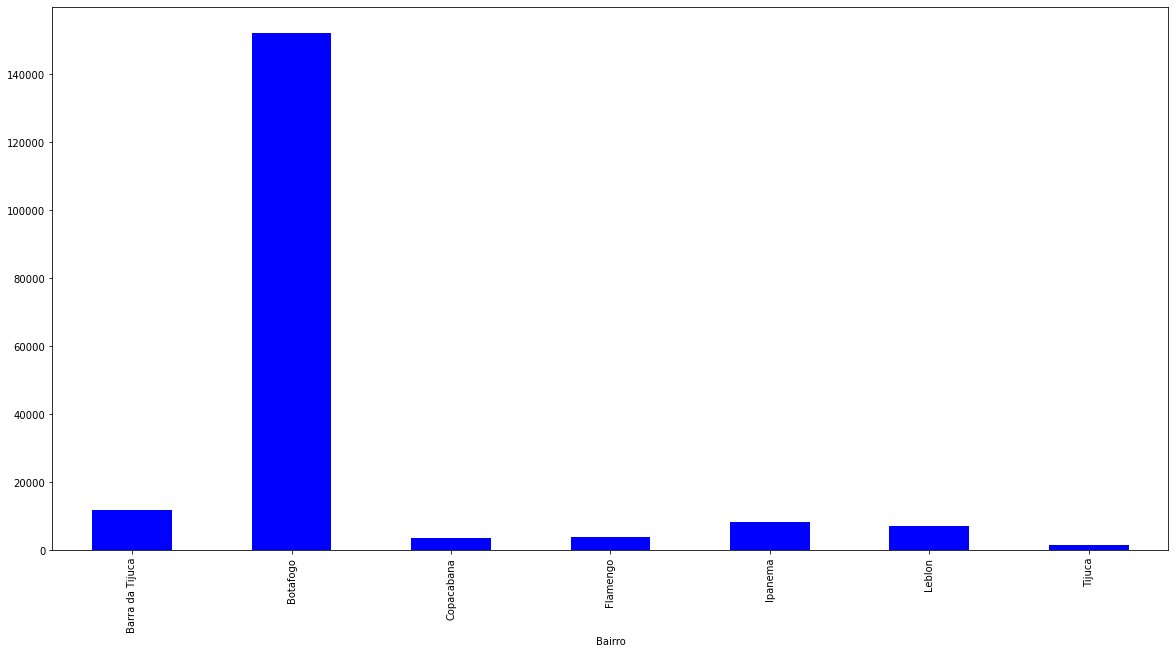

In [22]:
#atribui ah variavel fig o desvio padrao (.std()) da variavel valor com plot de barras na cor azul

fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')

In [23]:
fig

<AxesSubplot:xlabel='Bairro'>

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

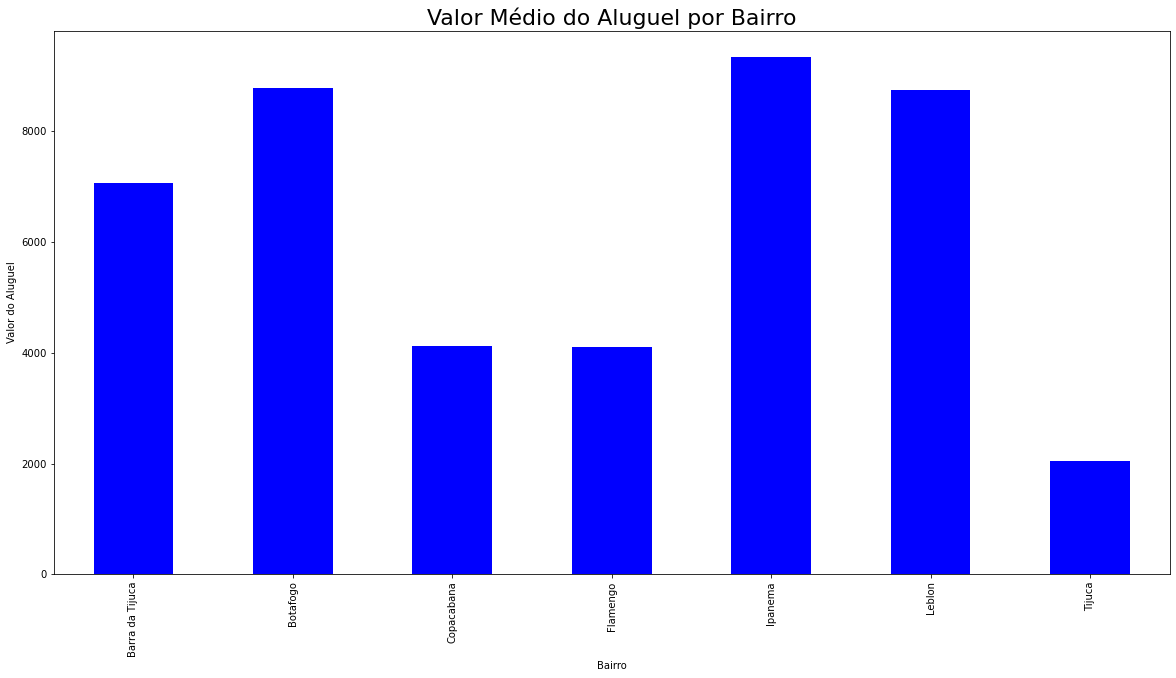

In [24]:
#plota o grafico com o valor das medias e muda titulo e nomenclatura do eixo Y. Alem disso, muda o valor da fonte
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [25]:
fig

<AxesSubplot:title={'center':'Valor Médio do Aluguel por Bairro'}, xlabel='Bairro', ylabel='Valor do Aluguel'>

Text(0.5, 1.0, 'Valor Maximo do Aluguel por Bairro')

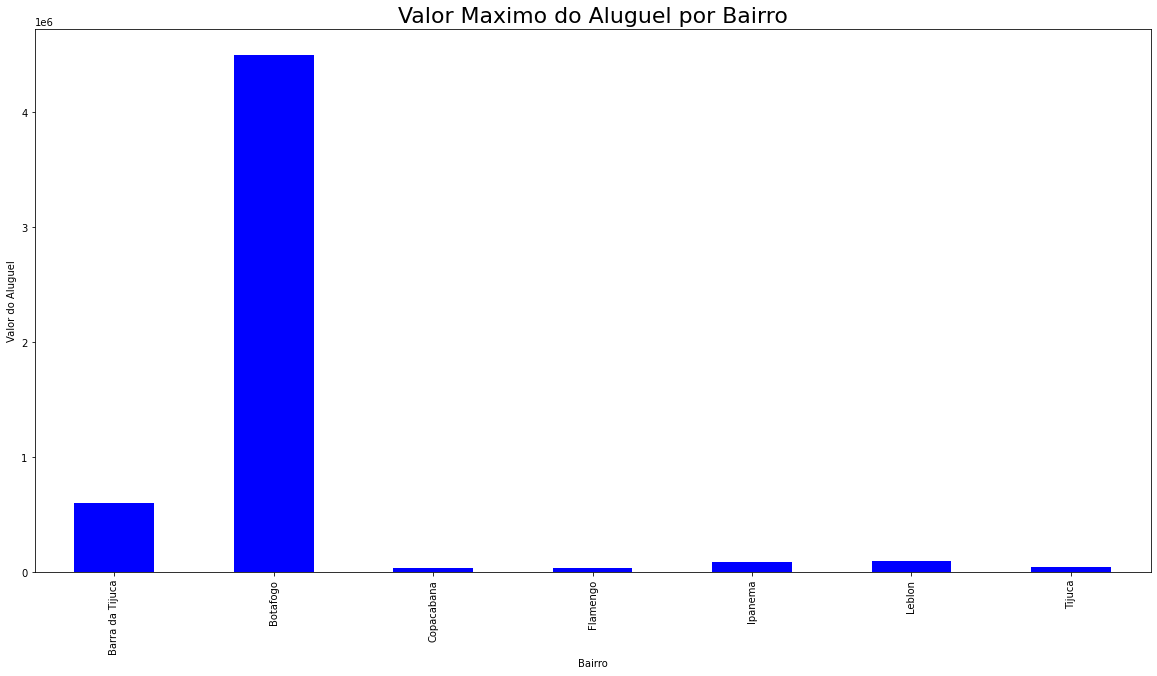

In [28]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Maximo do Aluguel por Bairro', {'fontsize': 22})